In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-prediction/loan_default_train.csv
/kaggle/input/loan-default-prediction/__results__.html
/kaggle/input/loan-default-prediction/loan_default_test.csv
/kaggle/input/loan-default-prediction/output_test.csv
/kaggle/input/loan-default-prediction/__notebook__.ipynb
/kaggle/input/loan-default-prediction/__output__.json
/kaggle/input/loan-default-prediction/output_train.csv
/kaggle/input/loan-default-prediction/custom.css
/kaggle/input/loan-default-prediction/__results___files/__results___55_3.png
/kaggle/input/loan-default-prediction/__results___files/__results___55_1.png
/kaggle/input/loan-default-prediction/__results___files/__results___146_0.png
/kaggle/input/loan-default-prediction/__results___files/__results___39_3.png
/kaggle/input/loan-default-prediction/__results___files/__results___39_0.png
/kaggle/input/loan-default-prediction/__results___files/__results___55_4.png
/kaggle/input/loan-default-prediction/__results___files/__results___39_1.png
/kaggle/input/l

In [2]:
X_train=pd.read_csv('/kaggle/input/loan-default-prediction/loan_default_train.csv')
X_test=pd.read_csv('/kaggle/input/loan-default-prediction/loan_default_test.csv')
y_train=pd.read_csv('/kaggle/input/loan-default-prediction/output_train.csv')
y_test=pd.read_csv('/kaggle/input/loan-default-prediction/output_test.csv')

In [3]:
def optimize_memory(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == object: 
            continue

        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

    return df

In [4]:
X_train=optimize_memory(X_train)
X_test=optimize_memory(X_test)

y_train=optimize_memory(y_train)
y_test=optimize_memory(y_test)

In [5]:
X_train.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,application_type_default_rate,verification_status_joint_default_rate,hardship_flag_default_rate,hardship_type_default_rate,hardship_reason_default_rate,hardship_status_default_rate,hardship_loan_status_default_rate,disbursement_method_default_rate,debt_settlement_flag_default_rate,settlement_status_default_rate
0,1404536,28200.0,8.190000,185000.0,10.220000,0.0,730.0,0.0,29.0,46.0,...,0.131977,0.131699,0.12845,0.126827,0.126827,0.126827,0.126827,0.132454,0.115363,0.115363
1,1686385,22950.0,13.490000,125000.0,22.580000,0.0,685.0,0.0,25.0,76.0,...,0.131977,0.131699,0.12845,0.126827,0.126827,0.126827,0.126827,0.132454,0.115363,0.115363
2,1919294,20000.0,7.900000,80000.0,15.560000,0.0,745.0,0.0,18.0,79.0,...,0.131977,0.131699,0.12845,0.126827,0.126827,0.126827,0.126827,0.132454,0.115363,0.115363
3,749681,10000.0,16.910000,52800.0,27.360001,0.0,695.0,1.0,25.0,93.0,...,0.131977,0.131699,0.12845,0.126827,0.126827,0.126827,0.126827,0.132454,0.115363,0.115363
4,869087,16000.0,18.940001,62400.0,9.250000,0.0,680.0,1.0,30.0,69.0,...,0.071006,0.070528,0.12845,0.126827,0.126827,0.126827,0.126827,0.132454,0.115363,0.115363


In [6]:
y_train.head()

,Unnamed: 0,y
0,1404536,0
1,1686385,0
2,1919294,0
3,749681,0
4,869087,0


In [7]:
X_train.drop(columns=['Unnamed: 0'],inplace=True)
X_test.drop(columns=['Unnamed: 0'],inplace=True)

y_train.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
X_train.isnull().sum()

loan_amnt                            0
int_rate                             0
annual_inc                           0
dti                                  0
delinq_2yrs                          0
                                    ..
hardship_status_default_rate         0
hardship_loan_status_default_rate    0
disbursement_method_default_rate     0
debt_settlement_flag_default_rate    0
settlement_status_default_rate       0
Length: 168, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [10]:
X=pd.concat([X_train,X_test],axis=0)
y=pd.concat([y_train,y_test],axis=0)

In [11]:
X=X.reset_index()
y=y.reset_index()

In [12]:
X.drop(columns=['index'],inplace=True)
y.drop(columns=['index'],inplace=True)

In [13]:
X_scaled=scale.transform(X)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=100,
                      class_weight='balanced',
                     solver='newton-cholesky',
                     )
lr.fit(X_train_scaled,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', solver='newton-cholesky')

In [15]:
from sklearn.metrics import classification_report
y_pred_lr=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    492590
           1       0.96      0.99      0.98     72577

    accuracy                           0.99    565167
   macro avg       0.98      0.99      0.99    565167
weighted avg       0.99      0.99      0.99    565167



In [16]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(lr, X_scaled, y, cv=kf, scoring='recall')

print("CV scores for each fold:", scores)
print("Mean CV score:", np.mean(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

CV scores for each fold: [0.98569904 0.98585924 0.98602557 0.98530088 0.9857893 ]
Mean CV score: 0.9857348071865685


In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_lr=confusion_matrix(y_test,y_pred_lr)

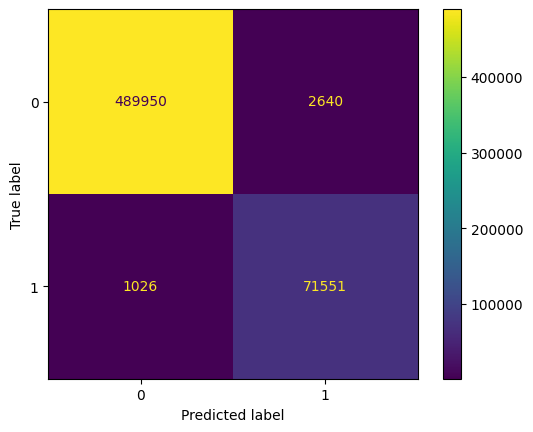

In [18]:
ConfusionMatrixDisplay(confusion_matrix=conf_lr).plot()
plt.show()

In [19]:
# Get coefficients
coeffs = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr.coef_[0]
})

# Sort by absolute importance
coeffs['importance'] = np.abs(coeffs['coefficient'])
coeffs = coeffs.sort_values(by='importance', ascending=False)

print(coeffs.head(15))  # Top 15 important features

                                    feature  coefficient  importance
18                               recoveries    36.036471   36.036471
15                              total_pymnt   -21.261987   21.261987
0                                 loan_amnt    19.394653   19.394653
14                                out_prncp   -15.063167   15.063167
16                            total_rec_int     5.879106    5.879106
144          hardship_end_date_months_since     3.624154    3.624154
145    payment_plan_start_date_months_since    -3.125765    3.125765
147            settlement_date_months_since     2.667947    2.667947
19                          last_pymnt_amnt    -2.421555    2.421555
94                    settlement_percentage    -2.186451    2.186451
20                     last_fico_range_high    -1.945131    1.945131
146  debt_settlement_flag_date_months_since    -1.582235    1.582235
167          settlement_status_default_rate     0.847966    0.847966
95                          settle

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=9,
                           min_samples_leaf=3,
                           class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3)

In [21]:
y_pred_dt=dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    492590
           1       0.95      0.98      0.96     72577

    accuracy                           0.99    565167
   macro avg       0.97      0.99      0.98    565167
weighted avg       0.99      0.99      0.99    565167



In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(dt, X, y, cv=kf, scoring='recall')

print("CV scores for each fold:", scores)
print("Mean CV score:", np.mean(scores))

CV scores for each fold: [0.98001996 0.98070001 0.98029778 0.97778951 0.98123148]
Mean CV score: 0.9800077478094854


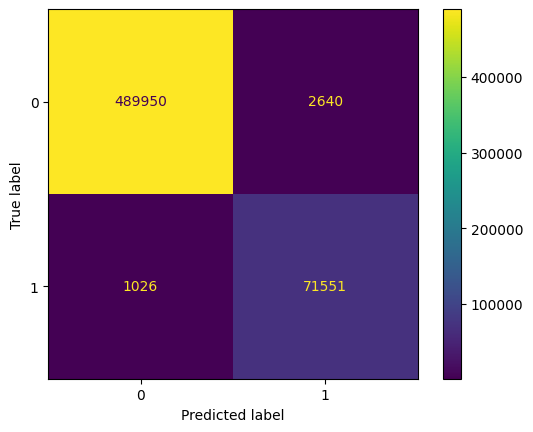

In [23]:
conf_dt=confusion_matrix(y_test,y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=conf_dt).plot()
plt.show()

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,
                           max_depth=9,
                           min_samples_leaf=3,
                           class_weight='balanced',
                           oob_score=True)
rf.fit(X_train,y_train)
print("OOB Score:", rf.oob_score_)

/tmp/ipykernel_36/2596978197.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


OOB Score: 0.9798619994915957


In [25]:
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    492590
           1       0.88      0.98      0.93     72577

    accuracy                           0.98    565167
   macro avg       0.94      0.98      0.96    565167
weighted avg       0.98      0.98      0.98    565167



In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf, X, y, cv=kf, scoring='recall')

print("CV scores for each fold:", scores)
print("Mean CV score:", np.mean(scores))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

CV scores for each fold: [0.98143113 0.9790374  0.98200576 0.97986749 0.98152609]
Mean CV score: 0.9807735735395721


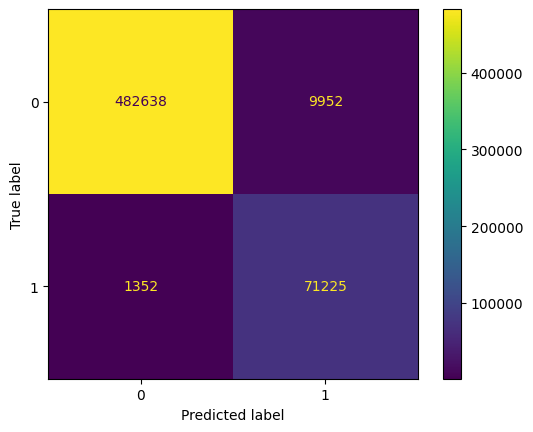

In [27]:
conf_rf=confusion_matrix(y_test,y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_rf).plot()
plt.show()

# XgBoost

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,
                           max_depth=9,
                           min_samples_leaf=3,
                           class_weight='balanced')
xgb.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:02:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [30]:
y_pred_xgb=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    492590
           1       1.00      1.00      1.00     72577

    accuracy                           1.00    565167
   macro avg       1.00      1.00      1.00    565167
weighted avg       1.00      1.00      1.00    565167



In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(xgb, X, y, cv=kf, scoring='recall')

print("CV scores for each fold:", scores)
print("Mean CV score:", np.mean(scores))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:12:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:13:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:15:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:16:20] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [15:17:40] WARNING

CV scores for each fold: [0.99867488 0.99859449 0.99863706 0.9985863  0.9989082 ]
Mean CV score: 0.9986801870583092


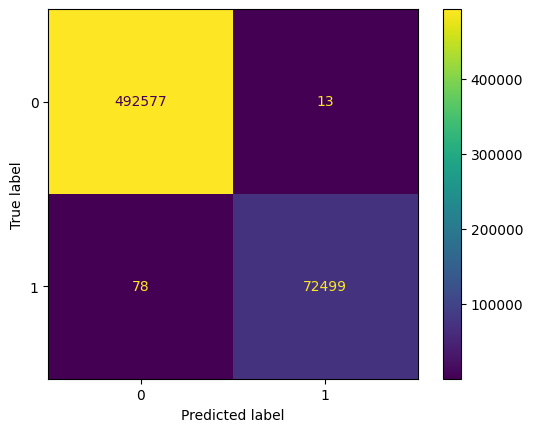

In [32]:
conf_xgb=confusion_matrix(y_test,y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=conf_xgb).plot()
plt.show()